# Import Library

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Read Dataset

In [2]:
studentInfo_df     = pd.read_csv('studentInfo.csv')
assessments_df     = pd.read_csv('assessments.csv')
studAssessments_df = pd.read_csv('studentAssessment.csv')
studentVle_df      = pd.read_csv('studentVle.csv')
vle_df             = pd.read_csv('vle.csv')

studentInfo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [3]:
assessments_df.tail() # Last 5 rows

,code_module,code_presentation,id_assessment,assessment_type,date,weight
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0
205,GGG,2014J,37444,Exam,229.0,100.0


In [4]:
exams  = assessments_df[assessments_df["assessment_type"] == "Exam"]
others = assessments_df[assessments_df["assessment_type"] != "Exam"]

amounts = others.groupby(["code_module","code_presentation"]).count()["id_assessment"]
amounts = amounts.reset_index()
amounts.head()

,code_module,code_presentation,id_assessment
0,AAA,2013J,5
1,AAA,2014J,5
2,BBB,2013B,11
3,BBB,2013J,11
4,BBB,2014B,11


In [5]:
others.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [6]:
studAssessments_df.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [7]:
stud_ass =pd.merge(studAssessments_df, others,how="inner",on=["id_assessment"])
stud_ass["weighted_grade"] = stud_ass["score"]*stud_ass["weight"]/100

In [8]:
avg_grade = stud_ass.groupby(["id_student","code_module","code_presentation"]).sum()["weighted_grade"].reset_index() #similar column value create a group and do shorting based on column which given at groupby function"groupby() "
avg_grade.head()

,id_student,code_module,code_presentation,weighted_grade
0,6516,AAA,2014J,63.50
1,8462,DDD,2013J,34.90
2,8462,DDD,2014J,43.00
3,11391,AAA,2013J,82.40
4,23629,BBB,2013B,16.69


In [9]:
stud_exams = pd.merge(studAssessments_df, exams, how="inner", on=["id_assessment"]) # merge studAssessments_df, exams dataset based on "id_assessment"
stud_exams["exam_score"] = stud_exams["score"]
stud_exams.drop(["id_assessment","date_submitted","is_banked", "score","assessment_type","date","weight"],axis=1,inplace=True) #drop some column
stud_exams.head()

,id_student,code_module,code_presentation,exam_score
0,558914,CCC,2014B,32.0
1,559706,CCC,2014B,78.0
2,559770,CCC,2014B,54.0
3,560114,CCC,2014B,64.0
4,560311,CCC,2014B,100.0


In [10]:
avg_per_site = studentVle_df.groupby(["id_student","id_site","code_module","code_presentation"]).mean().reset_index()
avg_per_site.head()

,id_student,id_site,code_module,code_presentation,date,sum_click
0,6516,877011,AAA,2014J,210.333333,3.833333
1,6516,877012,AAA,2014J,90.833333,2.310606
2,6516,877015,AAA,2014J,113.461538,2.000000
3,6516,877023,AAA,2014J,122.666667,2.000000
4,6516,877025,AAA,2014J,41.142857,4.333333


In [11]:
avg_per_student = avg_per_site.groupby(["id_student","code_module","code_presentation"]).mean()[["date","sum_click"]].reset_index()
avg_per_student.head()

,id_student,code_module,code_presentation,date,sum_click
0,6516,AAA,2014J,105.292573,5.816135
1,8462,DDD,2013J,38.794704,1.734524
2,8462,DDD,2014J,10.000000,3.000000
3,11391,AAA,2013J,111.739069,4.231515
4,23629,BBB,2013B,33.409632,2.817316


In [12]:
assessment_info = pd.merge(avg_grade, stud_exams, how="inner", on=["id_student","code_module","code_presentation"])
assessment_info.head()

,id_student,code_module,code_presentation,weighted_grade,exam_score
0,23698,CCC,2014J,69.97,80.0
1,24213,DDD,2014B,78.40,58.0
2,27116,CCC,2014J,92.02,96.0
3,28046,DDD,2013J,49.90,40.0
4,28787,CCC,2014J,11.98,44.0


In [13]:
df_1     = pd.merge(studentInfo_df, assessment_info, how="inner", on=["id_student","code_module","code_presentation"])
final_df = pd.merge(df_1,           avg_per_student, how="inner", on=["id_student","code_module","code_presentation"])

final_df.drop(["id_student","code_module","code_presentation"], axis = 1, inplace = True)

final_df.head()

,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,weighted_grade,exam_score,date,sum_click
0,M,East Anglian Region,A Level or Equivalent,50-60%,0-35,0,90,N,Distinction,89.65,94.0,103.457907,2.706754
1,M,East Anglian Region,HE Qualification,40-50%,0-35,0,60,N,Pass,84.58,76.0,87.617265,1.539047
2,M,Ireland,A Level or Equivalent,NaN,35-55,0,30,N,Pass,51.44,66.0,49.181286,1.562619
3,M,Scotland,HE Qualification,90-100%,35-55,0,60,N,Pass,75.13,50.0,118.698642,2.189217
4,M,East Anglian Region,HE Qualification,60-70%,35-55,0,60,N,Distinction,93.22,98.0,75.791987,2.100617


In [14]:
final_df.shape # number of row and column

(4955, 13)

In [15]:
final_df.describe()

,num_of_prev_attempts,studied_credits,weighted_grade,exam_score,date,sum_click
count,4955.000000,4955.000000,4955.000000,4955.000000,4955.000000,4955.000000
mean,0.118668,76.351160,66.224955,65.569929,101.032651,2.016386
std,0.395326,34.735952,21.285564,20.583311,24.915355,0.722199
min,0.000000,30.000000,1.120000,0.000000,17.566546,1.000000
25%,0.000000,60.000000,51.432500,51.000000,84.668807,1.545728
50%,0.000000,60.000000,69.750000,67.000000,99.934002,1.802812
75%,0.000000,90.000000,83.600000,82.000000,116.608707,2.280217
max,5.000000,630.000000,100.000000,100.000000,237.035714,13.134308


In [16]:
final_df["studied_credits"].mean() # Average value of "studied_credits"

76.35116044399597

In [17]:
final_df.isnull().sum() # sum How much NAN values are in final_df dataset

gender                    0
region                    0
highest_education         0
imd_band                355
age_band                  0
num_of_prev_attempts      0
studied_credits           0
disability                0
final_result              0
weighted_grade            0
exam_score                0
date                      0
sum_click                 0
dtype: int64

Handling Missing Value

In [18]:
mode = final_df['imd_band'].mode() # Mode use for find out which range are maximum in dataset , it's used for remove NAN value
mode

0    80-90%
dtype: object

In [19]:
final_df['imd_band'] = final_df['imd_band'].fillna(str(mode)) # fillna() used for assign mode value where has NAN value

In [20]:
final_df.isnull().sum()

gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
weighted_grade          0
exam_score              0
date                    0
sum_click               0
dtype: int64

In [21]:
final_df.info() # it's use for knowing total entries, feature and data type of each feature

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4955 entries, 0 to 4954
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                4955 non-null   object 
 1   region                4955 non-null   object 
 2   highest_education     4955 non-null   object 
 3   imd_band              4955 non-null   object 
 4   age_band              4955 non-null   object 
 5   num_of_prev_attempts  4955 non-null   int64  
 6   studied_credits       4955 non-null   int64  
 7   disability            4955 non-null   object 
 8   final_result          4955 non-null   object 
 9   weighted_grade        4955 non-null   float64
 10  exam_score            4955 non-null   float64
 11  date                  4955 non-null   float64
 12  sum_click             4955 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage: 542.0+ KB


In [22]:
final_df.head() # first 5 enries show

,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,weighted_grade,exam_score,date,sum_click
0,M,East Anglian Region,A Level or Equivalent,50-60%,0-35,0,90,N,Distinction,89.65,94.0,103.457907,2.706754
1,M,East Anglian Region,HE Qualification,40-50%,0-35,0,60,N,Pass,84.58,76.0,87.617265,1.539047
2,M,Ireland,A Level or Equivalent,0 80-90%\ndtype: object,35-55,0,30,N,Pass,51.44,66.0,49.181286,1.562619
3,M,Scotland,HE Qualification,90-100%,35-55,0,60,N,Pass,75.13,50.0,118.698642,2.189217
4,M,East Anglian Region,HE Qualification,60-70%,35-55,0,60,N,Distinction,93.22,98.0,75.791987,2.100617


In [23]:
x = final_df.loc[final_df['final_result'] == 'Distinction'] # find out which students are distinction from total students. 
# it's used mainly whoose student are Success and whoose are Failure but not dropout
x.shape

(881, 13)

In [24]:
train_stats_x = x.describe()
train_stats_x = train_stats_x.transpose()
train_stats_x # statistical analysis of dataset 

,count,mean,std,min,25%,50%,75%,max
num_of_prev_attempts,881.0,0.047673,0.218460,0.000000,0.000000,0.000000,0.000000,2.000000
studied_credits,881.0,75.312145,33.868716,30.000000,60.000000,60.000000,90.000000,270.000000
weighted_grade,881.0,79.926669,23.260121,14.120000,80.475000,89.300000,94.200000,100.000000
exam_score,881.0,92.762770,6.110667,67.000000,89.000000,94.000000,98.000000,100.000000
date,881.0,102.521812,23.311717,25.020376,87.926527,101.787646,116.909606,218.025714
sum_click,881.0,2.084315,0.672157,1.122549,1.557369,1.934482,2.438093,7.531390


In [25]:
success = train_stats_x["75%"]["studied_credits"] # Here i select that if a student can gain 75% credits, those students have to success 
success # Less 75% student_credits are failure but not Dropout

90.0

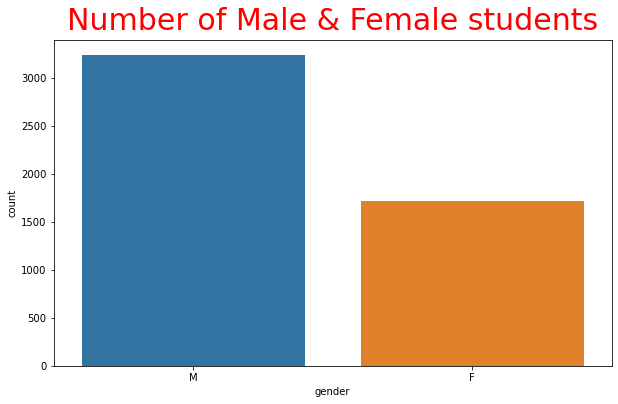

In [26]:
plt.figure(figsize = (10,6))
sns.countplot(x = final_df['gender'])
plt.title("Number of Male & Female students", color = 'r',size = 30, pad = 10);

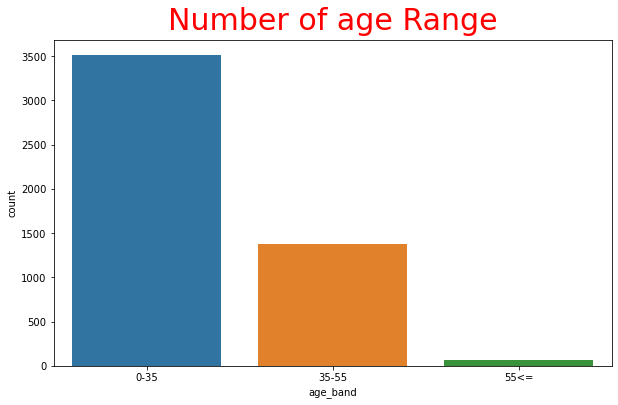

In [27]:
# This chart shows the age group of the bands
plt.figure(figsize = (10,6))
sns.countplot(x = final_df['age_band'])
plt.title("Number of age Range", color = 'r',size = 30, pad = 10);

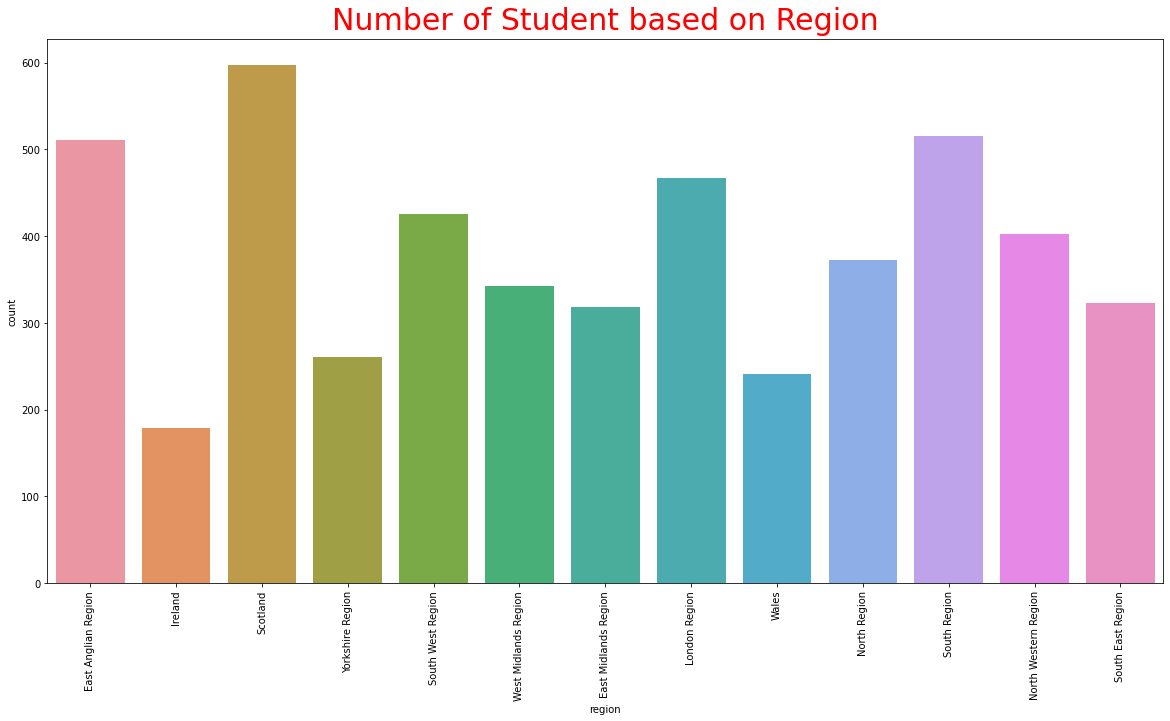

In [28]:
plt.figure(figsize = (20,10))
sns.countplot(x = final_df['region'])
plt.xticks(rotation = 90)
plt.title("Number of Student based on Region", color = 'r',size = 30, pad = 10);

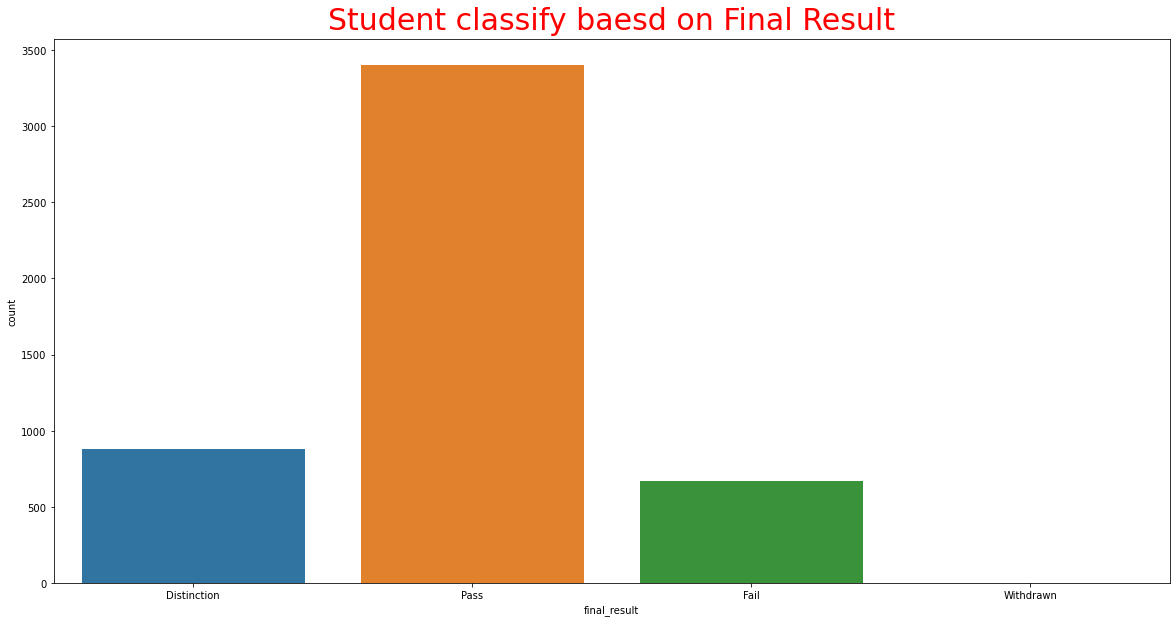

In [29]:
plt.figure(figsize = (20,10))
sns.countplot(data=final_df, x="final_result")
plt.title("Student classify baesd on Final Result", color = 'r',size = 30, pad = 10);

In [30]:
final_df["final_result"] = final_df["final_result"].replace("Withdrawn", "Fail")
# Here i replace Withdrawn by Fail because i consider that if student is withdrawn that means he/she is fail. 
# it's help me for binary classification insted of multi class classification.
final_df["final_result"] = final_df["final_result"].replace("Distinction", "Pass")

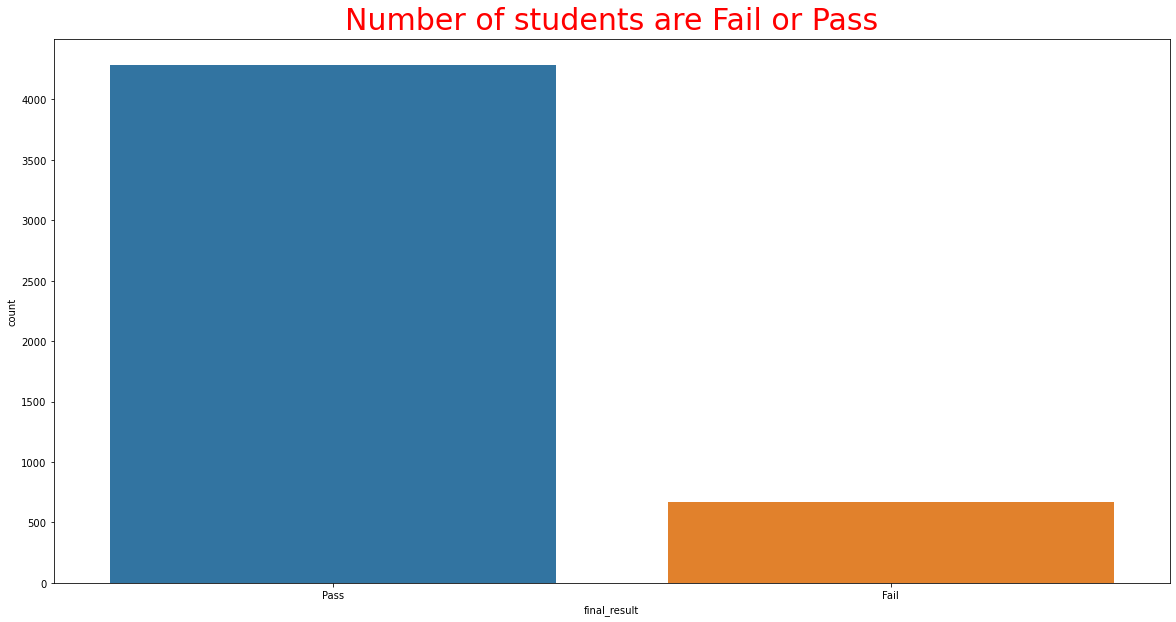

In [31]:
plt.figure(figsize = (20,10))
sns.countplot(data=final_df, x="final_result")
plt.title("Number of students are Fail or Pass", color = 'r',size = 30, pad = 10);

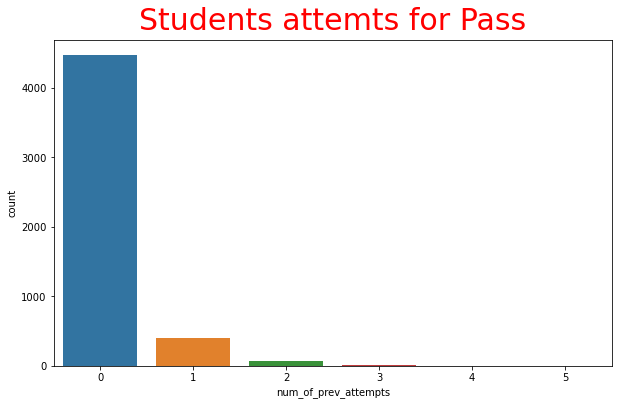

In [32]:
plt.figure(figsize = (10,6))
sns.countplot(x = final_df['num_of_prev_attempts'])
plt.title("Students attemts for Pass", color = 'r',size = 30, pad = 10);

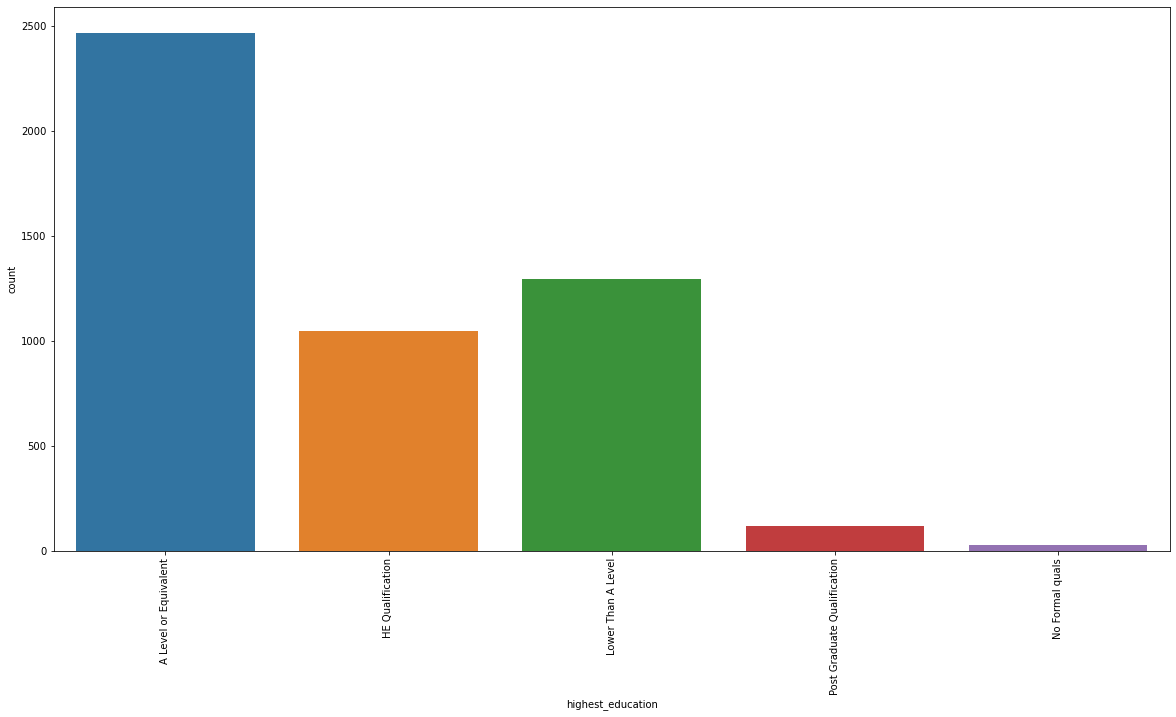

In [33]:
plt.figure(figsize = (20,10))
sns.countplot(x = final_df['highest_education'])
plt.xticks(rotation = 90);

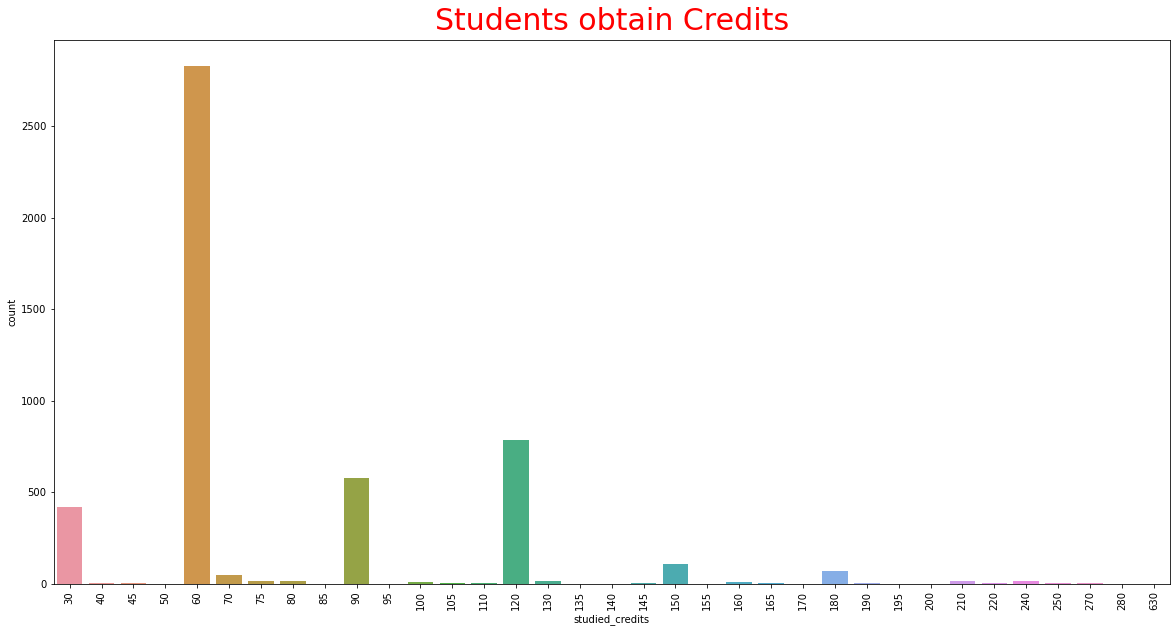

In [34]:
plt.figure(figsize = (20,10))
sns.countplot(x = final_df['studied_credits'])
plt.xticks(rotation = 90)
plt.title("Students obtain Credits", color = 'r',size = 30, pad = 10);

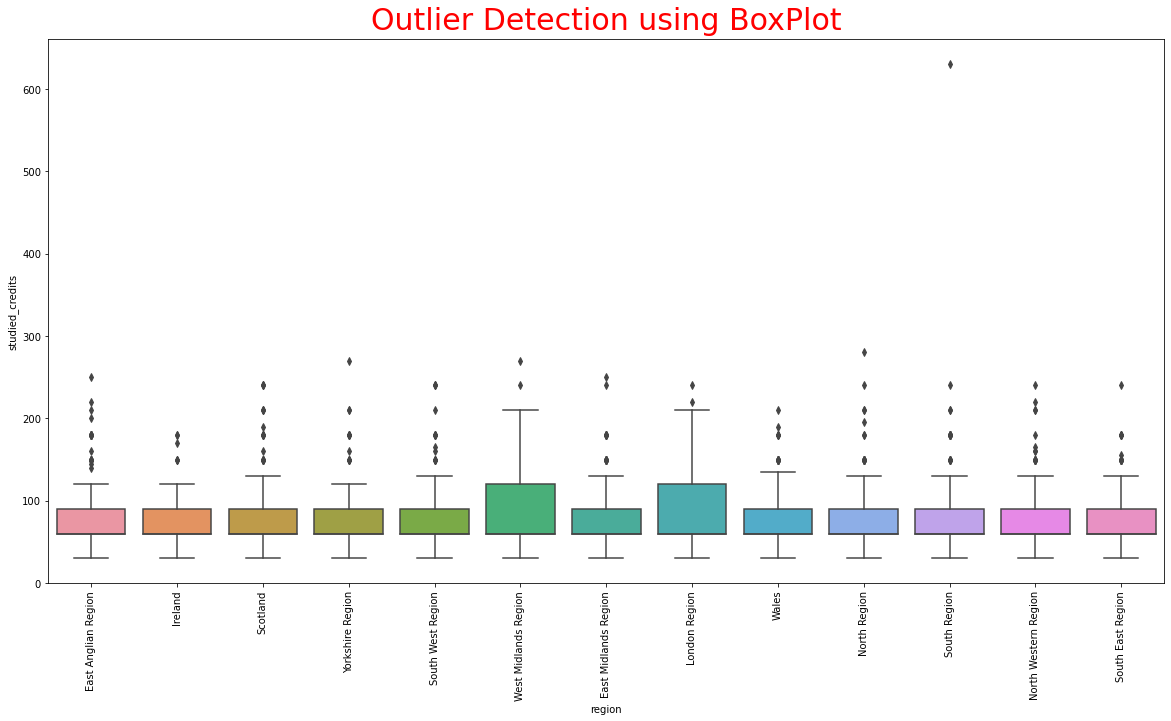

In [35]:
plt.figure(figsize = (20,10))
sns.boxplot(x = 'region', y = 'studied_credits', data = final_df)
plt.xticks(rotation = 90)
plt.title("Outlier Detection using BoxPlot", color = 'r',size = 30, pad = 10);

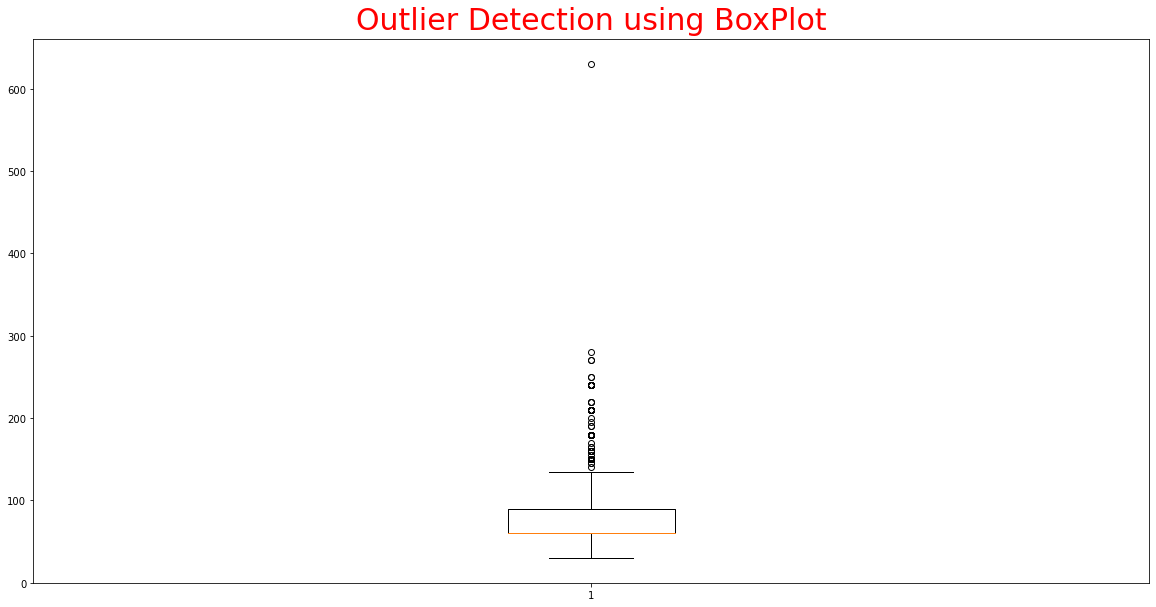

In [36]:
plt.figure(figsize = (20,10))
plt.boxplot(final_df["studied_credits"])
plt.title("Outlier Detection using BoxPlot", color = 'r',size = 30, pad = 10);

In [37]:
# It's statistical analysis for remove outlier
q1 = final_df["studied_credits"].quantile(0.25)
q2 = final_df["studied_credits"].quantile(0.75)
(q1,q2)

(60.0, 90.0)

In [38]:
IQR = q2 - q1
IQR

30.0

In [39]:
lower_limit = q1 - 1.5*IQR
upper_limit = q2 + 1.5*IQR
(lower_limit, upper_limit)

(15.0, 135.0)

In [40]:
final_df[(final_df["studied_credits"] < lower_limit) | (final_df["studied_credits"] > upper_limit)]

,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,weighted_grade,exam_score,date,sum_click
36,M,Scotland,Post Graduate Qualification,60-70%,35-55,0,150,N,Pass,93.94,96.0,127.574511,2.732384
43,M,West Midlands Region,A Level or Equivalent,60-70%,0-35,0,150,N,Pass,48.18,54.0,154.960677,2.940971
51,M,North Region,A Level or Equivalent,80-90%,0-35,0,180,N,Fail,41.73,30.0,105.262685,2.052958
61,F,East Anglian Region,A Level or Equivalent,40-50%,0-35,0,150,N,Pass,18.17,72.0,101.200178,1.641420
72,M,Yorkshire Region,HE Qualification,30-40%,0-35,0,160,N,Pass,81.35,78.0,140.610067,2.702306
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4899,M,London Region,Lower Than A Level,20-30%,0-35,0,180,Y,Pass,47.55,56.0,102.905498,1.454338
4901,M,West Midlands Region,A Level or Equivalent,0 80-90%\ndtype: object,35-55,0,160,N,Fail,50.30,36.0,106.053281,1.929125
4914,M,Scotland,HE Qualification,10-20,0-35,0,150,N,Pass,65.55,100.0,77.821499,1.598096
4916,F,East Anglian Region,A Level or Equivalent,70-80%,35-55,0,145,N,Pass,65.50,73.0,128.291127,1.868486


In [41]:
final_df = final_df[(final_df["studied_credits"] > lower_limit) & (final_df["studied_credits"] < upper_limit)]

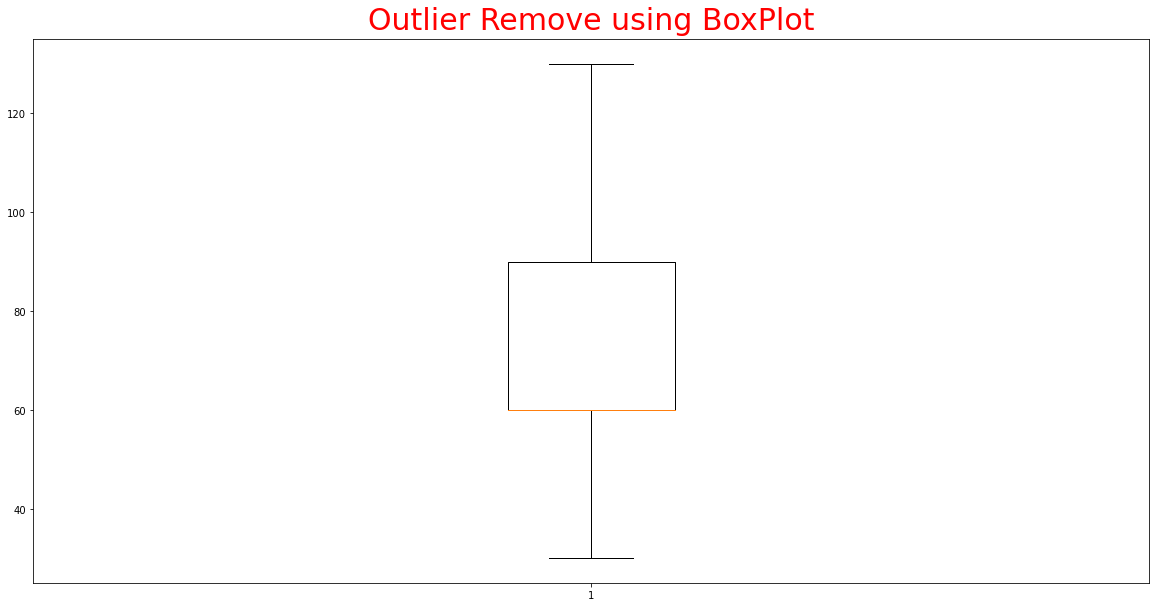

In [42]:
plt.figure(figsize = (20,10))
plt.boxplot(final_df["studied_credits"])
plt.title("Outlier Remove using BoxPlot", color = 'r',size = 30, pad = 10);

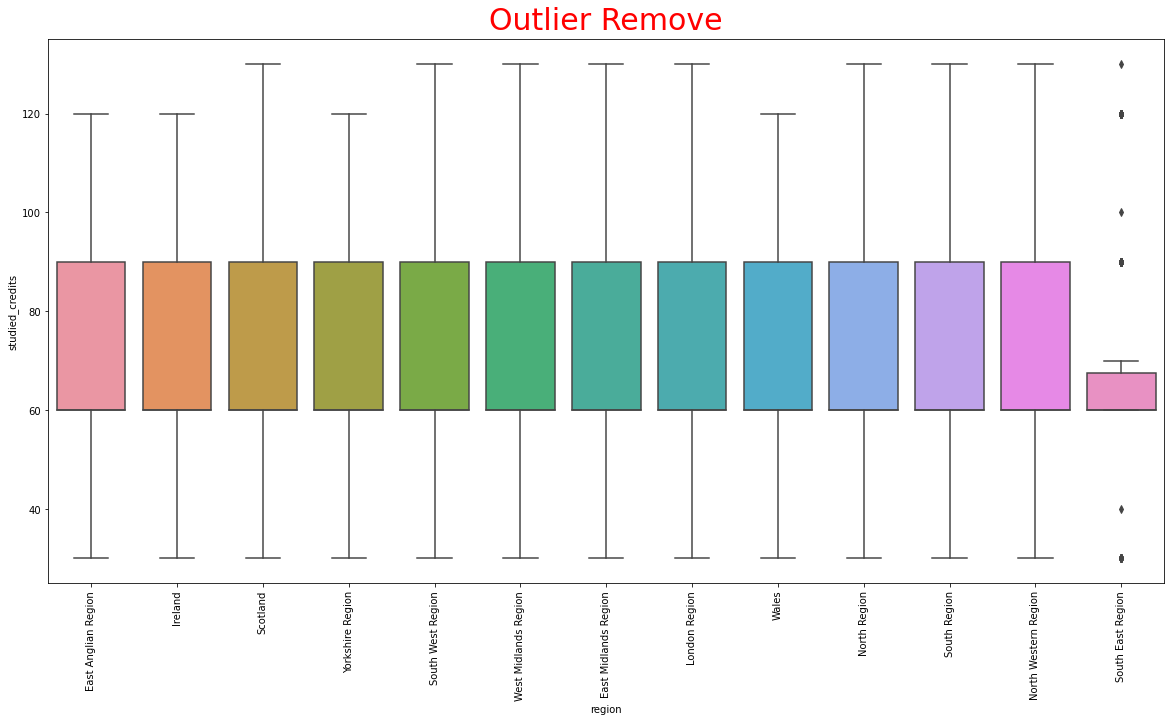

In [43]:
plt.figure(figsize = (20,10))
sns.boxplot(x = 'region', y = 'studied_credits', data = final_df)
plt.xticks(rotation = 90)
plt.title("Outlier Remove", color = 'r',size = 30, pad = 10);

In [44]:
cols = final_df.columns # Columns
cols

Index(['gender', 'region', 'highest_education', 'imd_band', 'age_band',
       'num_of_prev_attempts', 'studied_credits', 'disability', 'final_result',
       'weighted_grade', 'exam_score', 'date', 'sum_click'],
      dtype='object')

In [45]:
df_dummies = pd.get_dummies(final_df["final_result"]) # it's convert categorical data to numeric data for assinging 0 means Fail & 1 means Pass
df_dummies

,Fail,Pass
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
4950,0,1
4951,0,1
4952,0,1
4953,0,1


In [46]:
# It's convert all categorical feature data to numerical data
from sklearn.preprocessing import LabelEncoder

cols_to_encode = ['gender', 'region', 'highest_education', 
                  'imd_band', 'age_band', 'disability', 
                  'final_result']
# Encode categorical data
final_df[cols_to_encode] = final_df[cols_to_encode].apply(LabelEncoder().fit_transform)

final_df.head()

,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,weighted_grade,exam_score,date,sum_click
0,1,0,0,6,0,0,90,0,1,89.65,94.0,103.457907,2.706754
1,1,0,1,5,0,0,60,0,1,84.58,76.0,87.617265,1.539047
2,1,2,0,0,1,0,30,0,1,51.44,66.0,49.181286,1.562619
3,1,6,1,10,1,0,60,0,1,75.13,50.0,118.698642,2.189217
4,1,0,1,7,1,0,60,0,1,93.22,98.0,75.791987,2.100617


In [47]:
train_stats = final_df.describe()
train_stats.pop("final_result")
train_stats.pop("studied_credits")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
gender,4720.0,0.655932,0.475114,0.000000,0.000000,1.000000,1.000000,1.000000
region,4720.0,5.794280,3.561622,0.000000,3.000000,6.000000,9.000000,12.000000
highest_education,4720.0,0.851059,0.989272,0.000000,0.000000,1.000000,2.000000,4.000000
imd_band,4720.0,5.416314,3.085108,0.000000,3.000000,6.000000,8.000000,10.000000
age_band,4720.0,0.309322,0.493310,0.000000,0.000000,0.000000,1.000000,2.000000
num_of_prev_attempts,4720.0,0.110169,0.385890,0.000000,0.000000,0.000000,0.000000,5.000000
disability,4720.0,0.080932,0.272760,0.000000,0.000000,0.000000,0.000000,1.000000
weighted_grade,4720.0,66.514379,21.274265,1.120000,51.947500,70.150000,83.837500,100.000000
exam_score,4720.0,65.748305,20.528785,0.000000,51.000000,67.000000,82.000000,100.000000
date,4720.0,101.020149,24.857697,17.566546,84.611230,99.934672,116.607155,237.035714


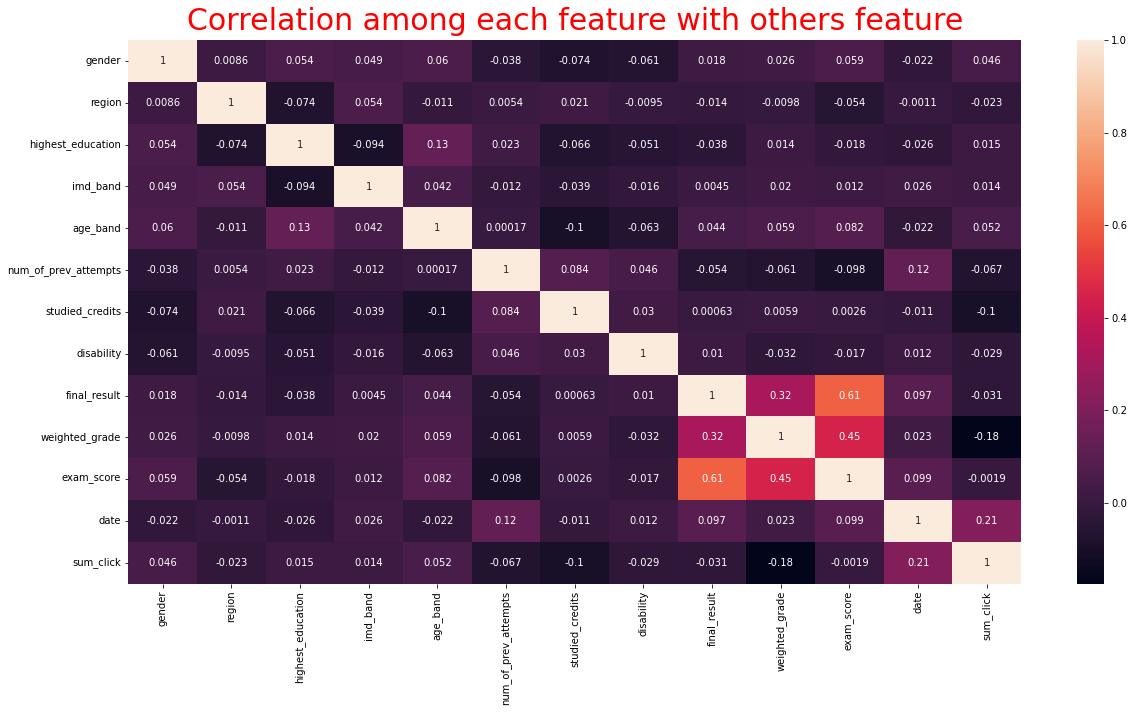

In [48]:
plt.figure(figsize=(20,10))
sns.heatmap(final_df.corr(),annot=True)
plt.title("Correlation among each feature with others feature", color = 'r',size = 30, pad = 10);

In [49]:
# split df into 80:20 train and test sets

train, test = train_test_split(final_df, test_size= 0.2, random_state = 1)

# # split train into 80:20 train and val sets
train, val = train_test_split(train, test_size=0.2, random_state = 1)

In [50]:
train

,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,weighted_grade,exam_score,date,sum_click
2633,1,0,0,6,0,0,60,0,1,86.525,87.0,77.650995,1.694053
1303,1,4,0,0,0,0,60,1,1,89.170,78.0,104.274718,2.046458
3166,1,11,0,8,0,0,120,0,1,75.600,62.0,58.747908,1.675854
3023,1,3,0,1,0,0,120,0,1,74.000,62.0,69.738899,1.943650
4363,1,4,0,0,0,0,120,0,1,59.750,96.0,120.620203,1.623787
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1817,1,9,1,4,1,0,60,0,1,86.620,54.0,133.561819,3.235530
1875,1,2,4,0,0,0,90,0,1,24.640,82.0,126.972377,3.804070
4790,1,4,0,5,0,0,120,1,1,83.250,91.0,143.971092,1.528018
1457,1,7,0,2,0,0,30,0,1,60.720,42.0,114.938937,3.749413


In [51]:
def format_output(data):
  final_result = data.pop("final_result")
  final_result = np.array(final_result)

  studied_credits = data.pop("studied_credits")
  studied_credits = np.array(studied_credits)

  return (studied_credits, final_result)

In [52]:
# # format the output of the train set
train_Y = format_output(train)

# # format the output of the val set
val_Y = format_output(val)
    
# # format the output of the test set
test_Y = format_output(test)
test_Y[1]

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,

In [53]:
train_Y[1] # Classification data 

array([1, 1, 1, ..., 1, 1, 1])

In [54]:
# Normalization function use for normalize data between (-1 to 1)
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

In [55]:
# # normalize the train set
norm_train_X = norm(train)
    
# # normalize the val set
norm_val_X = norm(val)
    
# # normalize the test set
norm_test_X = norm(test)

In [56]:
norm_test_X

,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,disability,weighted_grade,exam_score,date,sum_click
3409,0.72418,0.619302,0.150556,1.485746,3.427214,-0.285494,-0.296716,0.879496,0.499381,-0.879485,-0.749086
3116,-1.38058,-0.223011,-0.860288,-0.459081,-0.627034,-0.285494,-0.296716,-0.424897,-1.351678,-0.783536,0.597341
3552,-1.38058,-0.503782,-0.860288,-1.755631,-0.627034,2.305917,-0.296716,0.832490,0.499381,-0.187127,-0.935073
3110,0.72418,-0.784552,1.161400,-0.134943,-0.627034,-0.285494,-0.296716,-0.664624,-0.474860,0.869370,-0.352544
3699,0.72418,1.461615,-0.860288,-0.783218,-0.627034,-0.285494,3.369513,0.593939,1.327487,0.717528,-0.939641
...,...,...,...,...,...,...,...,...,...,...,...
822,0.72418,-0.223011,0.150556,-1.431494,-0.627034,2.305917,-0.296716,-2.359394,-0.669709,1.717293,0.591386
1095,0.72418,-1.065323,3.183088,-1.755631,-0.627034,-0.285494,-0.296716,-0.471197,-1.059405,-1.532136,0.434546
3756,0.72418,0.900073,-0.860288,-0.459081,-0.627034,-0.285494,-0.296716,0.054555,0.353245,-1.189077,-0.471498
248,0.72418,-0.223011,0.150556,-0.783218,1.400090,-0.285494,-0.296716,-1.821185,0.986502,-0.894344,-0.233602


In [57]:
input_shape = norm_train_X.shape[1]
input_shape

11

In [58]:
# Deep learning model
def base_model(inputs):
  x = Dense(128, activation = 'relu')(inputs)
  x = Dense(128, activation = 'relu')(x)

  return x

In [59]:
def final_model(inputs):
    
    # get the base model
    x = base_model(inputs)

    # connect the output Dense layer for regression
    studied_credits = Dense(units='1', name='studied_credits')(x)

    # connect the output Dense layer for classification. this will use a sigmoid activation.
    final_result = Dense(units='1', activation='sigmoid', name='final_result')(x)

    # define the model using the input and output layers
    model = Model(inputs= inputs, outputs = [studied_credits, final_result])

    return model

In [60]:
inputs = tf.keras.layers.Input(shape=(input_shape,))
rms = tf.keras.optimizers.RMSprop(lr=0.0001)
model = final_model(inputs)

model.compile(optimizer=rms, 
              loss = {'final_result' : 'binary_crossentropy',
                      'studied_credits' : 'mean_squared_error'
                     },
              metrics = {'final_result' : 'accuracy',
                         'studied_credits': tf.keras.metrics.RootMeanSquaredError()
                       }
             )

In [61]:
history = model.fit(norm_train_X, train_Y,
                    epochs = 150,
                    validation_data = (norm_val_X, val_Y))

Epoch 1/150
95/95 [==============================] - 3s 9ms/step - loss: 5637.0952 - studied_credits_loss: 5636.4404 - final_result_loss: 0.6560 - studied_credits_root_mean_squared_error: 75.0762 - final_result_accuracy: 0.6606 - val_loss: 5535.1177 - val_studied_credits_loss: 5534.4727 - val_final_result_loss: 0.6440 - val_studied_credits_root_mean_squared_error: 74.3940 - val_final_result_accuracy: 0.6852
Epoch 2/150
95/95 [==============================] - 0s 4ms/step - loss: 5365.1128 - studied_credits_loss: 5364.5005 - final_result_loss: 0.6119 - studied_credits_root_mean_squared_error: 73.2428 - final_result_accuracy: 0.7930 - val_loss: 5229.2842 - val_studied_credits_loss: 5228.7178 - val_final_result_loss: 0.5667 - val_studied_credits_root_mean_squared_error: 72.3099 - val_final_result_accuracy: 0.8598
Epoch 3/150
95/95 [==============================] - 0s 4ms/step - loss: 5037.9688 - studied_credits_loss: 5037.4531 - final_result_loss: 0.5168 - studied_credits_root_mean_squar

Epoch 21/150
95/95 [==============================] - 0s 4ms/step - loss: 739.6910 - studied_credits_loss: 739.2944 - final_result_loss: 0.3966 - studied_credits_root_mean_squared_error: 27.1900 - final_result_accuracy: 0.8603 - val_loss: 749.7169 - val_studied_credits_loss: 749.3211 - val_final_result_loss: 0.3959 - val_studied_credits_root_mean_squared_error: 27.3737 - val_final_result_accuracy: 0.8598
Epoch 22/150
95/95 [==============================] - 0s 4ms/step - loss: 736.1190 - studied_credits_loss: 735.7258 - final_result_loss: 0.3931 - studied_credits_root_mean_squared_error: 27.1243 - final_result_accuracy: 0.8603 - val_loss: 747.6952 - val_studied_credits_loss: 747.3018 - val_final_result_loss: 0.3933 - val_studied_credits_root_mean_squared_error: 27.3368 - val_final_result_accuracy: 0.8598
Epoch 23/150
95/95 [==============================] - 0s 5ms/step - loss: 733.3557 - studied_credits_loss: 732.9650 - final_result_loss: 0.3907 - studied_credits_root_mean_squared_erro

95/95 [==============================] - 0s 5ms/step - loss: 700.4958 - studied_credits_loss: 700.1478 - final_result_loss: 0.3480 - studied_credits_root_mean_squared_error: 26.4603 - final_result_accuracy: 0.8603 - val_loss: 722.7886 - val_studied_credits_loss: 722.4388 - val_final_result_loss: 0.3497 - val_studied_credits_root_mean_squared_error: 26.8782 - val_final_result_accuracy: 0.8598
Epoch 42/150
95/95 [==============================] - 0s 5ms/step - loss: 699.2556 - studied_credits_loss: 698.9098 - final_result_loss: 0.3458 - studied_credits_root_mean_squared_error: 26.4369 - final_result_accuracy: 0.8603 - val_loss: 722.0319 - val_studied_credits_loss: 721.6838 - val_final_result_loss: 0.3482 - val_studied_credits_root_mean_squared_error: 26.8642 - val_final_result_accuracy: 0.8598
Epoch 43/150
95/95 [==============================] - 0s 5ms/step - loss: 698.1719 - studied_credits_loss: 697.8281 - final_result_loss: 0.3440 - studied_credits_root_mean_squared_error: 26.4164 - 

95/95 [==============================] - 0s 4ms/step - loss: 681.4843 - studied_credits_loss: 681.1708 - final_result_loss: 0.3133 - studied_credits_root_mean_squared_error: 26.0992 - final_result_accuracy: 0.8603 - val_loss: 708.5905 - val_studied_credits_loss: 708.2728 - val_final_result_loss: 0.3176 - val_studied_credits_root_mean_squared_error: 26.6134 - val_final_result_accuracy: 0.8598
Epoch 62/150
95/95 [==============================] - 0s 4ms/step - loss: 680.8950 - studied_credits_loss: 680.5828 - final_result_loss: 0.3121 - studied_credits_root_mean_squared_error: 26.0880 - final_result_accuracy: 0.8603 - val_loss: 707.7871 - val_studied_credits_loss: 707.4713 - val_final_result_loss: 0.3159 - val_studied_credits_root_mean_squared_error: 26.5983 - val_final_result_accuracy: 0.8598
Epoch 63/150
95/95 [==============================] - 0s 4ms/step - loss: 679.9448 - studied_credits_loss: 679.6336 - final_result_loss: 0.3111 - studied_credits_root_mean_squared_error: 26.0698 - 

95/95 [==============================] - 0s 4ms/step - loss: 669.1931 - studied_credits_loss: 668.9062 - final_result_loss: 0.2868 - studied_credits_root_mean_squared_error: 25.8632 - final_result_accuracy: 0.8616 - val_loss: 699.6896 - val_studied_credits_loss: 699.4005 - val_final_result_loss: 0.2892 - val_studied_credits_root_mean_squared_error: 26.4462 - val_final_result_accuracy: 0.8624
Epoch 82/150
95/95 [==============================] - 0s 4ms/step - loss: 668.6412 - studied_credits_loss: 668.3561 - final_result_loss: 0.2849 - studied_credits_root_mean_squared_error: 25.8526 - final_result_accuracy: 0.8649 - val_loss: 699.2390 - val_studied_credits_loss: 698.9498 - val_final_result_loss: 0.2892 - val_studied_credits_root_mean_squared_error: 26.4377 - val_final_result_accuracy: 0.8611
Epoch 83/150
95/95 [==============================] - 0s 4ms/step - loss: 668.1182 - studied_credits_loss: 667.8334 - final_result_loss: 0.2848 - studied_credits_root_mean_squared_error: 25.8425 - 

95/95 [==============================] - 0s 4ms/step - loss: 660.1082 - studied_credits_loss: 659.8441 - final_result_loss: 0.2643 - studied_credits_root_mean_squared_error: 25.6874 - final_result_accuracy: 0.8768 - val_loss: 694.5731 - val_studied_credits_loss: 694.3065 - val_final_result_loss: 0.2667 - val_studied_credits_root_mean_squared_error: 26.3497 - val_final_result_accuracy: 0.8664
Epoch 102/150
95/95 [==============================] - 0s 4ms/step - loss: 659.7836 - studied_credits_loss: 659.5201 - final_result_loss: 0.2636 - studied_credits_root_mean_squared_error: 25.6811 - final_result_accuracy: 0.8775 - val_loss: 694.3120 - val_studied_credits_loss: 694.0468 - val_final_result_loss: 0.2653 - val_studied_credits_root_mean_squared_error: 26.3448 - val_final_result_accuracy: 0.8677
Epoch 103/150
95/95 [==============================] - 0s 4ms/step - loss: 659.3389 - studied_credits_loss: 659.0763 - final_result_loss: 0.2626 - studied_credits_root_mean_squared_error: 25.6725 

95/95 [==============================] - 0s 4ms/step - loss: 653.3525 - studied_credits_loss: 653.1058 - final_result_loss: 0.2465 - studied_credits_root_mean_squared_error: 25.5559 - final_result_accuracy: 0.8911 - val_loss: 691.0669 - val_studied_credits_loss: 690.8205 - val_final_result_loss: 0.2464 - val_studied_credits_root_mean_squared_error: 26.2835 - val_final_result_accuracy: 0.8836
Epoch 122/150
95/95 [==============================] - 0s 4ms/step - loss: 652.8696 - studied_credits_loss: 652.6240 - final_result_loss: 0.2455 - studied_credits_root_mean_squared_error: 25.5465 - final_result_accuracy: 0.8914 - val_loss: 690.9057 - val_studied_credits_loss: 690.6602 - val_final_result_loss: 0.2456 - val_studied_credits_root_mean_squared_error: 26.2804 - val_final_result_accuracy: 0.8836
Epoch 123/150
95/95 [==============================] - 0s 4ms/step - loss: 652.9644 - studied_credits_loss: 652.7197 - final_result_loss: 0.2447 - studied_credits_root_mean_squared_error: 25.5484 

95/95 [==============================] - 0s 4ms/step - loss: 647.7343 - studied_credits_loss: 647.5017 - final_result_loss: 0.2327 - studied_credits_root_mean_squared_error: 25.4461 - final_result_accuracy: 0.8997 - val_loss: 688.8556 - val_studied_credits_loss: 688.6234 - val_final_result_loss: 0.2323 - val_studied_credits_root_mean_squared_error: 26.2416 - val_final_result_accuracy: 0.8862
Epoch 142/150
95/95 [==============================] - 0s 4ms/step - loss: 647.3099 - studied_credits_loss: 647.0781 - final_result_loss: 0.2317 - studied_credits_root_mean_squared_error: 25.4377 - final_result_accuracy: 0.8937 - val_loss: 688.7405 - val_studied_credits_loss: 688.5094 - val_final_result_loss: 0.2311 - val_studied_credits_root_mean_squared_error: 26.2395 - val_final_result_accuracy: 0.9061
Epoch 143/150
95/95 [==============================] - 0s 4ms/step - loss: 647.2095 - studied_credits_loss: 646.9780 - final_result_loss: 0.2316 - studied_credits_root_mean_squared_error: 25.4358 

In [62]:
loss, studied_credits_loss, final_result_loss, studied_credits_rmse, final_result_accuracy = model.evaluate(x = norm_val_X, y = val_Y) 

24/24 [==============================] - 0s 3ms/step - loss: 688.2100 - studied_credits_loss: 687.9839 - final_result_loss: 0.2260 - studied_credits_root_mean_squared_error: 26.2294 - final_result_accuracy: 0.9048


In [63]:
predictions = model.predict(norm_test_X)

30/30 [==============================] - 0s 2ms/step


In [64]:
studied_credits_pred = predictions[0]
final_result_pred = predictions[1]

In [65]:
def plot_metrics(history,metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0,ylim)
    plt.plot(history.history[metric_name],color='blue',label=metric_name)
    plt.plot(history.history['val_' + metric_name],color='r',label='val_' + metric_name)
    plt.legend()
    plt.show();


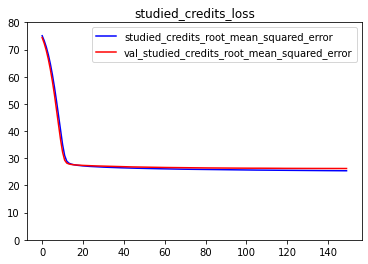

In [66]:
plot_metrics(history, 'studied_credits_root_mean_squared_error', 'studied_credits_loss', ylim=80)

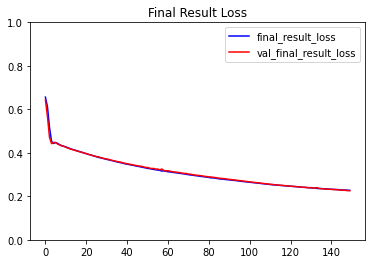

In [67]:
plot_metrics(history, 'final_result_loss', 'Final Result Loss', ylim=1)

In [68]:
#model.predict([[ 0.89156122,  1.11872367, -0.00816457,  1.6697829 ,  1.44317207, -0.31682056, -0.32043865,  0.41943067, -1.13379996]])

#  Predict user input Data

In [69]:
Prediction = model.predict(norm_test_X)

30/30 [==============================] - 0s 2ms/step


In [70]:
s_credits =float("{:.2f}".format(Prediction[0][8][0]))
Result = float("{:.2f}".format(Prediction[1][8][0]))

Result, s_credits

(0.54, 77.46)


RQ1: First i check student is dropout or not based on final_result. Here i use deep learning and as it's classification problem
so i use here binary classification and use "Sigmoid" activation function which give us probability for continuous data. As sigmoid give output 1 when the probability equal 0.5 or greater than 0.5 otherwise it's give output 0. As we know that from df_dummies, there i saw 0 means students are fail and 1 means student is pass.


RQ2. If student do not dropout that time i check studied_credits, and i consider HERE have to get 75% credit , whose student obtain 75% or more they are "Success otherwise Failure but they are not dropout".



In [71]:
if( Result >= 0.5):
    print("Student is not Drop-out\n")
    if (s_credits >= success):
        print("Student is Success")
    else:
        print("Student is Failure")
          
else:
    print("Student is Drop-out")

Student is not Drop-out

Student is Failure


#  Supervised Machine Learning Algorithm

In [72]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [73]:

clf=RandomForestClassifier(max_depth=5,n_estimators=120) #  n_estimators– number of trees the algorithm builds before averaging the predictions.
# The max_depth of a tree in Random Forest is defined as the longest path between the root node and the leaf node
#Train the model using the training sets y_pred=clf.predict(norm_test_X)
clf.fit(norm_train_X,train_Y[1])

y_pred=clf.predict(norm_test_X)

In [74]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_Y[1], y_pred))

Accuracy: 0.9555084745762712


In [75]:
x = clf.predict(norm_test_X)
x

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [76]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix
import itertools
cm= confusion_matrix(test_Y[1], y_pred) 

In [77]:
# We can understand through Confusion matrix that how much True and False value are.
def plot_confusion_matrix(cm, title = '', labels = [0,1]):
  #cm = confusion_matrix(y_true, y_pred)
  fig = plt.figure(figsize = (10,8))
  ax = fig.add_subplot(111)
  cax = ax.matshow(cm)
  plt.title('Confusion matrix of the classifier', color = 'r', size = 15, pad = 10)
  fig.colorbar(cax)
  ax.set_xticklabels([""] + labels)
  ax.set_yticklabels([""] + labels)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  fmt = 'd'
  thresh = cm.max() / 2
  for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, format(cm[i, j], fmt),
             horizontalalignment = 'center',
             color = 'black' if cm[i, j] > thresh else 'white'
             )
  plt.show();

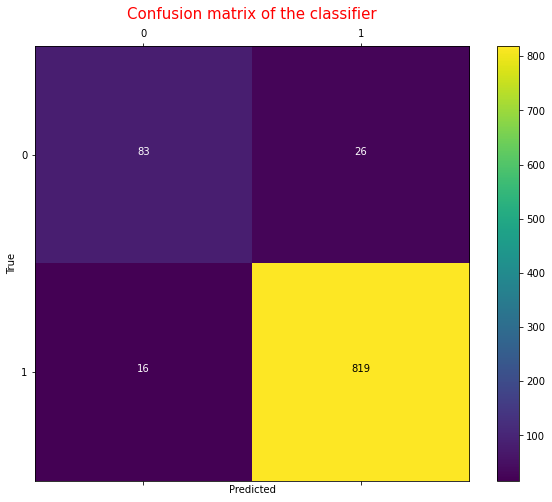

In [78]:
plot_confusion_matrix(cm, title='Wine Type', labels = [0, 1])

# Regression 

In [79]:
#Fitting the Multiple Linear Regression (MLR) model to the training set:  
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(norm_train_X, train_Y[0])  

LinearRegression()

In [80]:
#Predicting the Test set result;  
y_pred = regressor.predict(norm_test_X) 
y_pred

array([59.39866571, 75.90198874, 86.19333799, 70.28064762, 76.57378083,
       78.88702802, 75.36856791, 68.18704846, 75.2149601 , 69.3086973 ,
       69.4087222 , 66.52228209, 67.25635535, 64.74723269, 74.49678408,
       71.20539003, 74.03740873, 69.41646264, 76.84552767, 63.33151237,
       65.23801946, 76.75120368, 66.86157369, 70.87983803, 72.51793879,
       76.35473401, 72.92065267, 74.83534933, 67.52329195, 80.65302468,
       76.40153477, 76.64825448, 69.030985  , 63.89626534, 66.74572571,
       73.5451318 , 69.98303602, 75.10197708, 71.8331111 , 71.05092447,
       72.7093817 , 72.8138912 , 68.9849217 , 74.54454536, 60.42543412,
       71.43471791, 70.73666944, 65.03746942, 68.4388584 , 77.59995272,
       64.32828064, 69.75657677, 70.16040967, 70.97611753, 79.5556971 ,
       73.11245638, 79.50457531, 68.603637  , 77.10980441, 65.84070082,
       72.51022943, 76.7933085 , 72.08397635, 66.34736662, 68.20312011,
       79.15160135, 62.0185806 , 68.86977628, 77.99560497, 71.82

In [81]:
studied_credits = round(y_pred[1], 2)
final_Result = x[1]

studied_credits, final_Result

(75.9, 0)

In [82]:
if( final_Result == 1):
    print("Student is not Drop-out\n")
    if (studied_credits >= success):
        print("Student is Success")
    else:
        print("Student is Failure")
          
else:
    print("Student is Drop-out")

Student is Drop-out
